In [224]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [229]:
rental = pd.read_csv("./Toronto_apartment_rentals_2018.csv")
X = rental.drop(["Price", "Address"], axis=1)
y = rental["Price"].str.replace('$', '', regex=True).str.replace(',', '', regex=True)
y = y.astype(float)
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.05, random_state=42)
print(X.head())

   Bedroom  Bathroom  Den        Lat       Long
0        2       2.0    0  43.581639 -79.648193
1        1       1.0    1  43.643051 -79.391643
2        1       1.0    0  43.660605 -79.378635
3        2       2.0    0  43.641087 -79.381405
4        1       1.0    0  43.652487 -79.389622


In [230]:
column_tranform = make_column_transformer(
    (MinMaxScaler(), ["Bedroom","Bathroom","Den","Lat","Long"]), #turn all values in these column between 0 and 1
)


In [235]:
column_tranform.fit(train_data)

train_data_normal = column_tranform.transform(train_data)
test_data_normal = column_tranform.transform(test_data)

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),    
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

records = model.fit(train_data_normal, train_labels, epochs=10)

Epoch 1/10
34/34 [==============================] - 0s 750us/step - loss: 3708.0017 - mae: 3708.0017
Epoch 2/10
34/34 [==============================] - 0s 716us/step - loss: 3705.3284 - mae: 3705.3284
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 3692.2336 - mae: 3692.2336
Epoch 4/10
34/34 [==============================] - 0s 987us/step - loss: 3644.9854 - mae: 3644.9854
Epoch 5/10
34/34 [==============================] - 0s 799us/step - loss: 3518.0972 - mae: 3518.0972
Epoch 6/10
34/34 [==============================] - 0s 778us/step - loss: 3243.4719 - mae: 3243.4719
Epoch 7/10
34/34 [==============================] - 0s 767us/step - loss: 2731.5317 - mae: 2731.5317
Epoch 8/10
34/34 [==============================] - 0s 747us/step - loss: 2139.9563 - mae: 2139.9563
Epoch 9/10
34/34 [==============================] - 0s 779us/step - loss: 2001.6471 - mae: 2001.6471
Epoch 10/10
34/34 [==============================] - 0s 772us/step - loss: 1990.9037 - mae: 1

1/1 [==============================] - 0s 28ms/step
[[1707.2488]]


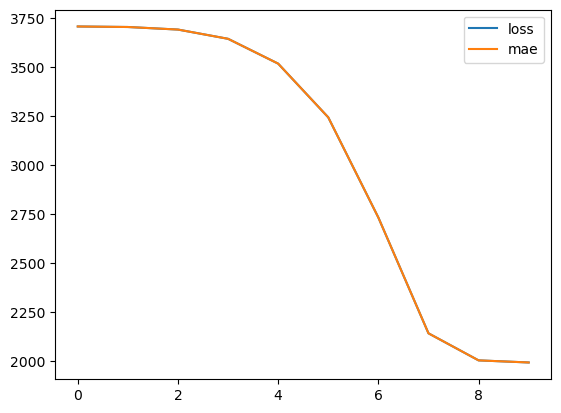

In [237]:
test_loss = model.evaluate(test_data, test_labels)
# new_data = [[3, 2, 1, 40.72, -74.00]]
new_data = [[2, 2, 0, 43.6460058, -79.3899085]]
# new_data = scaler.transform(new_data)
pd.DataFrame(records.history).plot()
prediction = model.predict(new_data)
print(prediction)

In [238]:
model.save("toronto_rental_prediction_v1.h5")